In [4]:
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def parser(d):
    return datetime.strptime(d, '%Y-%m')
parser("2018-08")


/home/rakesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


datetime.datetime(2018, 8, 1, 0, 0)

In [5]:
datetime.strptime("2018-08"  , "%Y-%m")

datetime.datetime(2018, 8, 1, 0, 0)

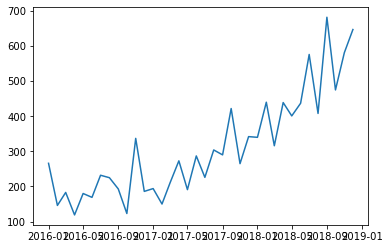

In [6]:
sales = read_csv('sales-cars.csv', parse_dates=[0], index_col=0,  date_parser=parser)
plt.plot(sales)

In [7]:
sales.shape

(36, 1)

In [8]:
type(sales)

pandas.core.frame.DataFrame

In [9]:
sales.head(5)

,Date
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [10]:
sales.isnull().sum()

Date    0
dtype: int64

In [11]:
sales.index[1]

Timestamp('2016-02-01 00:00:00')

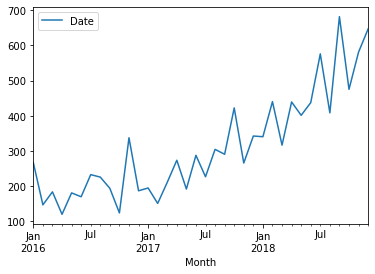

In [12]:
sales.plot()  # sales.plot and sales.plot() : both are different

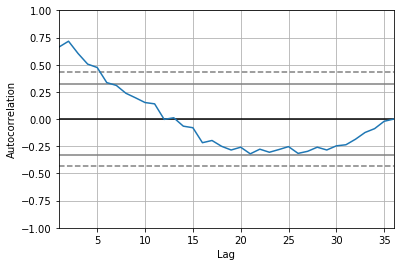

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sales)
plt.show()

In [14]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = sales.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []




In [15]:
X.shape

(36, 1)

predicted=387.407476, expected=440.000000
predicted=348.840939, expected=316.000000
predicted=386.124031, expected=439.000000
predicted=356.499513, expected=401.000000
predicted=446.001185, expected=437.000000
predicted=394.743316, expected=576.000000
predicted=434.901217, expected=408.000000
predicted=507.485863, expected=682.000000
predicted=436.277194, expected=475.000000
predicted=652.611339, expected=581.000000
predicted=546.585378, expected=647.000000
Test MSE: 8131.388


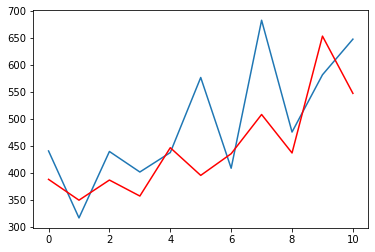

In [16]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    

error = mean_squared_error(test, predictions)

print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [17]:
#blue line test data and red line train data
